In [46]:
import numpy as np
import matplotlib.pyplot as plt

640
960


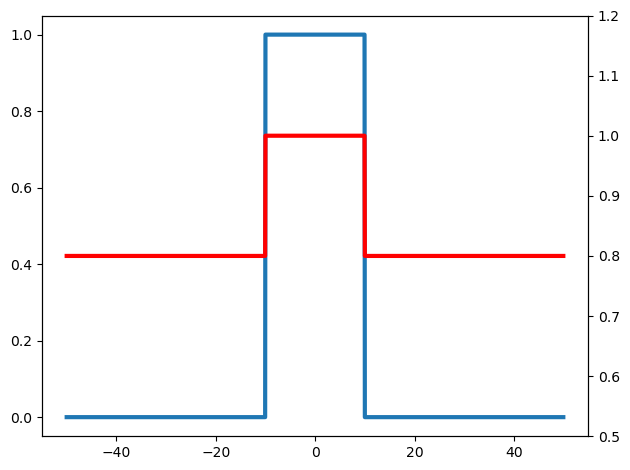

In [87]:
# Initial Setup

dx = .0625
z = np.arange(-50,50,dx)
index_left = np.where(z == -10.)[0][0]
print(index_left)
index_right = np.where(z == 10.)[0][0]
print(index_right)
psi = np.zeros((len(z)))
psi[index_left:index_right] = 1.

dens = np.full((len(z)),0.8)
dens[index_left:index_right] = 1.

fig, ax1 = plt.subplots()
ax1.plot(z,psi, linewidth=3)
ax2 = ax1.twinx() 
ax2.plot(z,dens, linewidth=3, color='red')
ax2.set_ylim(0.5,1.2)
fig.tight_layout()
plt.show()

In [88]:
# Define values
rhos = 1.
rhol = 0.7
A = 5
B = 5

In [89]:
def dpsi2dz2(psi, dx):
    # secondderiv = np.arange(-50,50,dx)
    # for i,y in enumerate(psi):
        # if i == 0:
            # secondderiv[i] = 0
        # elif i == len(psi)-1:
            # secondderiv[i] = 0
        # else:
            # secondderiv[i] = (psi[i+1] + psi[i-1] - 2*psi[i]) / dx**2
    
    # return secondderiv
    diff = np.gradient(np.gradient(psi, dx), dx)
    # diff = np.append([0], diff)
    return diff

def dfdpsi(psi, rho, dx):
    seconddiv = dpsi2dz2(psi,dx)
    f2 = 0.5*B*(rho-rhos)**2
    f1 = 0.5*A*(rho-rhol)**2
    f2 = np.nan_to_num(f2, nan=0.0)
    f1 = np.nan_to_num(f1, nan=0.0)
    return -.5*seconddiv + 2*psi*(1-psi)**2+2*psi**2*(1-psi)+(6*psi-6*psi**2)*(f2-f1)

def dfdrho(psi,rho):
    df1drho = A*(rho-rhol)
    df2drho = B*(rho-rhos)
    return df1drho + (3*psi**2-2*psi**3)*(df2drho-df1drho)

def chi(psi,rho,dx):
    df_drho = dfdrho(psi,rho)
    nabla_df_drho = np.gradient(df_drho, dx)
    func = (1-psi+0.1*psi)*(nabla_df_drho)
    func = np.nan_to_num(func, nan=0.0)

    # chi = np.arange(-50,50,dx)

    # for i,y in enumerate(func):
        # if i == 0:
            # chi[i] = 0
        # elif i == len(func)-1:
            # chi[i] = 0
        # else:
            # chi[i] = (func[i+1] - func[i]) / dx
    
    # return chi
    return np.gradient(func, dx)

In [ ]:
# Setting up the solver
t = 5
dt = 1e-5
psi_t = np.zeros((int(t/dt),int(len(z))))
psi_t[0,:] = psi

dens_t = np.zeros((int(t/dt),int(len(z))))
dens_t[0,:] = dens

time = np.arange(0,int(t),dt)

for ts in range(psi_t.shape[0]-1):
    dens_t[ts+1,:] = dens_t[ts,:] + dt*chi(psi_t[ts,:],dens_t[ts,:],dx)
    psi_t[ts+1,:] = psi_t[ts,:] - dt*dfdpsi(psi_t[ts,:], dens_t[ts,:],dx)

    psi_t[ts+1,0] = 0.
    psi_t[ts+1,-1] = 0.
    dens_t[ts+1,0] = 0.8
    dens_t[ts+1,-2] = 0.8
    dens_t[ts+1,-1] = 0.8



print(len(psi_t))

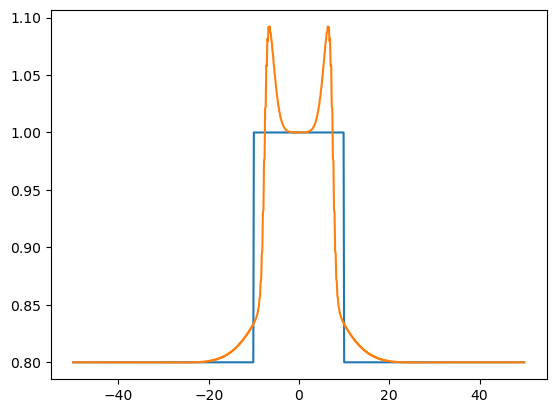

In [85]:
plt.plot(z,dens_t[0,:])
plt.plot(z,dens_t[-1,:])

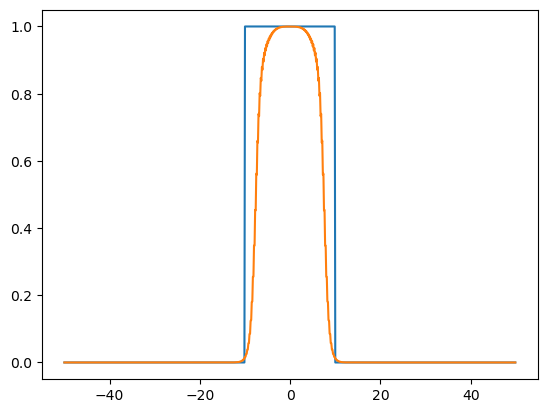

In [86]:
plt.plot(z,psi_t[0,:])
plt.plot(z,psi_t[-1,:])

160
240


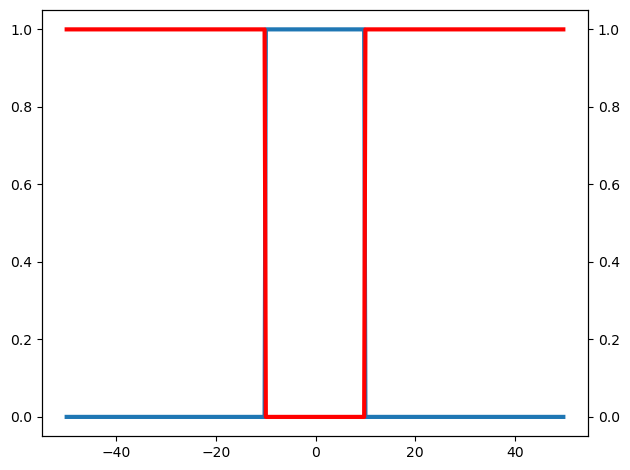

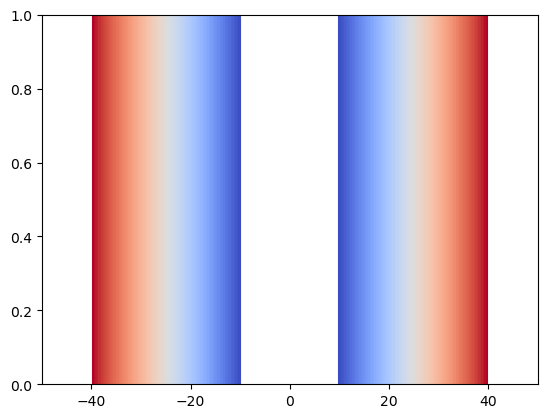

In [90]:
# Sharp Interface
# Initial Setup

dx = .25
z = np.arange(-50,50,dx)
index_left = np.where(z == -10.)[0][0]
print(index_left)
index_right = np.where(z == 10.)[0][0]
print(index_right)
c_solid = np.zeros((len(z)))
c_solid[index_left:index_right] = 1.

c_liquid = np.ones((len(z)))
c_liquid[index_left:index_right] = 0.


fig, ax1 = plt.subplots()
ax1.plot(z,c_solid, linewidth=3)
ax2 = ax1.twinx() 
ax2.plot(z,c_liquid, linewidth=3, color='red')
fig.tight_layout()
plt.show()

dl = 5.
ds = 1.
S = .1

def v(dl,cl,ds,cs,S):
    dcldx = np.append(np.diff(cl), [0])
    dcsdx = np.append(np.diff(cs), [0])

    return S*(dl*dcldx-ds*dcsdx)


interface_left = -10.
interface_right = 10.
dx = .5
z = np.arange(-50,50,dx)
cmap = plt.get_cmap('coolwarm') 
k=100
colors = cmap(np.linspace(0, 1, k))
interfaces_left = np.zeros(k)
interfaces_right = np.zeros(k)
time = np.zeros(k)
dt = 0.5

for i, color in enumerate(colors):
    # print(interface_left)
    # index_left = np.where(z == interface_left)[0][0]

    interfaces_left[i] = interface_left
    interfaces_right[i] = interface_right
    time[i] = i*dt


    index_left = np.argmin(np.abs(z-interface_left))
    index_right = np.argmin(np.abs(z-interface_right))

    # print(index_left)
    # print(index_right)


    # index_right = np.where(z == interface_right)[0][0]
    c_solid = np.zeros((len(z)))
    c_solid[index_left:index_right] = 1.

    # plt.plot(z,c_solid)

    c_liquid = np.ones((len(z)))
    c_liquid[index_left:index_right] = 0.
    plt.axvline(interface_left, color=color)
    plt.axvline(interface_right, color=color)

    interface_left += dt*np.min(v(dl,c_liquid,ds,c_solid,S))
    interface_right += dt*np.max(v(dl,c_liquid,ds,c_solid,S))

fig.tight_layout()
plt.xlim(-50,50)
plt.show()
   


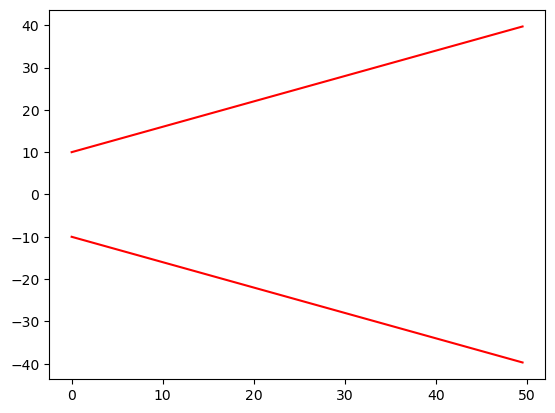

In [93]:
plt.plot(time,interfaces_left, color='r')
plt.plot(time,interfaces_right, color='r')